<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Estadística con SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En esta clase nos vamos a centrar en **cálculos estadísticos**._

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## scipy.stats

Este módulo contiene un gran número de __distribuciones de probabilidad__, tanto continuas como discretas, así como un creciente número de __funciones estadísticas__.

In [15]:
# Importar el módulo entero
import scipy.stats as st

In [16]:
# Información
np.info(st)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each included distribution is an instance of the class rv_continous:
For each given name the following methods are available:

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_continuous.pdf
   rv_continuous.logpdf
   rv_continuous.cdf
   rv_continuous.logcdf
   rv_continuous.sf
   rv_continuous.logsf
   rv_continuous.ppf
   rv_continuous.isf
   rv_continuous.moment
   rv_continuous.stats
   rv_continuous.entropy
   rv_continuous.fit
   rv_continuous.expect

Calling the instance as a function returns a frozen pdf whose shape,
location, and scale parameters are fixed.

Similarly, each discrete distribution is an instance of the class
rv_discrete:

.. autosummary::
   :toctree: generated/

   rv_discrete
   rv_discrete.rvs
   rv_discrete.pmf
   rv_discrete.logpmf
   rv_discrete.cdf
   

### Funciones

Carguemos unos datos, por ejemplo unas notas de la carrera, y veamos cómo podemos aprovechar las funciones de `scipy.stats`.

In [17]:
# esta línea no funciona en Windows
!head ../data/notas.csv

In [18]:
# Leemos el archivo
datos = np.loadtxt("../data/notas.csv", skiprows=1)
datos

array([ 2.9,  4.3,  3.9,  0. ,  4.1,  7.3,  2.3,  5.6,  2.9,  3.9,  4.6,
        6.3,  2.1,  2.1,  6.5,  1.9,  0. ,  6.5,  2.5,  5.1,  5.3,  6.3,
        5.4,  5.3,  5.3,  2. ,  3.5,  4.4,  5.5,  3.6,  3.9,  2.5,  4.1,
        3. ,  4.6,  4. ,  6.3,  0.6,  2.4,  6.5,  2.3,  4.6,  6.9,  5.1,
        5.4,  5.3,  4.5,  6.5,  2.1,  5.5,  3.4,  8.1,  4. ,  1.9,  1.6,
        4.3,  4.6,  5.4,  1. ,  6.5,  5.5,  4.9,  4. ,  5.3,  3.5,  4.4,
        2.8,  5.4,  3.5,  2.3,  4.8,  2.1,  6.6,  0.5,  2.1,  3.1,  3.4,
        5.9,  3.4,  4.3,  1.5,  5.5,  4.4,  1.9,  4.4,  2.9,  3.9,  5.8,
        2.8,  3. ,  1.5,  2.6,  2.9,  3.4,  5.4,  3.6,  4.6,  5. ,  1.4,
        4.3,  4.6,  3.1,  2. ,  3.6,  4. ,  2.5,  3. ,  5.1,  6.4,  3.5,
        5.8,  4.1,  5.9,  4. ,  6.4,  2.3,  7. ,  1.4,  3.5,  4.4,  2.9,
        5.1,  3.4,  4.8,  4.6,  4.3,  6.9,  5.4,  4. ,  3.3,  1.4,  1.9,
        3.8,  3.4,  3.6,  3.8,  6.3,  4.8,  4. ,  6.8,  4. ,  3.6,  4.4,
        4.1,  6. ,  4.1,  5.6,  3.9,  4.6,  5. ,  6

In [19]:
# Descripción rápida de los datos
st.describe(datos)

(375,
 (0.0, 8.5),
 3.9706666666666668,
 2.5927736185383243,
 -0.13203546994646295,
 -0.06611485627230884)

In [20]:
# Histograma con st
st.histogram(datos, numbins=10, defaultlimits=(0,10))

(array([ 17.,  20.,  61.,  78.,  98.,  61.,  29.,   9.,   2.,   0.]),
 0,
 1.0,
 0)

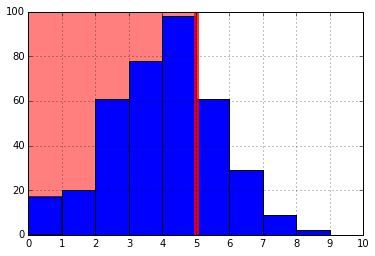

In [21]:
# Pintemos un histograma con plt
plt.hist(datos, range(0,11,))
plt.xticks(range(0,11))
plt.grid(True)

plt.vlines(5, 0, 100, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [100, 100], color='red', alpha=0.5)

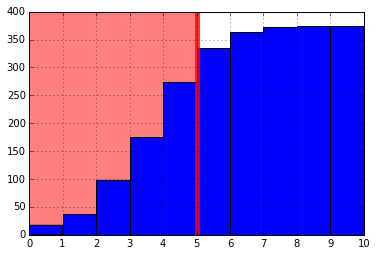

In [22]:
# Pintemos un histograma acumulado con plt
plt.hist(datos, range(0,11), cumulative=True)
plt.xticks(range(0,11))

plt.vlines(5, 0, 400, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [400, 400], color='red', alpha=0.5)

plt.grid(True)

In [23]:
# Percentil
st.percentileofscore(datos, 5)

73.733333333333334

In [24]:
# Nota de un percentil
st.scoreatpercentile(datos, 50)

4.0

__¿Te parecen _normales_ estas notas?__ No, no me refiero a si te gustan o no... Me refiero a que si crees que estas notas se distribuyen de manera gaussiana.

### Distribuciones estadísticas

In [25]:
# Parámetros
med = st.nanmean(datos)
des_tip = st.nanstd(datos)

# Distribución normal
dist_normal = st.norm(loc=med, scale=des_tip)

Ahora podemos ver:

* Función densidad de probabilidad (probability density function) `pdf`
* Función de distribución (cumulative distribution function) `cdf`

De esta manera, nos ahorramos definir funciones como:

$$N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

$$\phi(x)=\intop_{-\infty}^{x}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$$

Para calcular probabilidades $P[a\leq X\leq b]=\intop_{a}^{b}f(x)dx$



In [26]:
# Calculamos la pdf
x = np.linspace(0, 10, 100)
y1 = dist_normal.pdf(x)
y1

array([  1.18466112e-02,   1.38013272e-02,   1.60154276e-02,
         1.85117381e-02,   2.13131100e-02,   2.44420387e-02,
         2.79202305e-02,   3.17681221e-02,   3.60043569e-02,
         4.06452262e-02,   4.57040834e-02,   5.11907430e-02,
         5.71108776e-02,   6.34654270e-02,   7.02500358e-02,
         7.74545375e-02,   8.50625018e-02,   9.30508640e-02,
         1.01389654e-01,   1.10041839e-01,   1.18963303e-01,
         1.28102958e-01,   1.37403018e-01,   1.46799426e-01,
         1.56222440e-01,   1.65597374e-01,   1.74845495e-01,
         1.83885049e-01,   1.92632412e-01,   2.01003342e-01,
         2.08914298e-01,   2.16283816e-01,   2.23033887e-01,
         2.29091330e-01,   2.34389108e-01,   2.38867558e-01,
         2.42475512e-01,   2.45171267e-01,   2.46923389e-01,
         2.47711323e-01,   2.47525793e-01,   2.46368984e-01,
         2.44254502e-01,   2.41207102e-01,   2.37262214e-01,
         2.32465247e-01,   2.26870729e-01,   2.20541268e-01,
         2.13546393e-01,

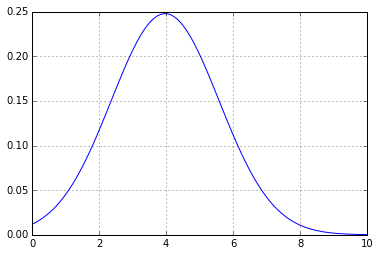

In [27]:
# La representamos
plt.plot(x, y1)
plt.grid(True)

In [28]:
# Calculamos la cdf
y2 = dist_normal.cdf(x)
y2

array([ 0.00683286,  0.00812612,  0.00962974,  0.01137106,  0.01337976,
        0.01568777,  0.0183293 ,  0.02134067,  0.02476018,  0.02862791,
        0.03298542,  0.03787547,  0.04334158,  0.04942765,  0.05617737,
        0.06363372,  0.07183834,  0.08083088,  0.0906483 ,  0.1013242 ,
        0.11288805,  0.12536454,  0.13877285,  0.15312598,  0.1684302 ,
        0.18468445,  0.20187994,  0.21999975,  0.2390186 ,  0.25890272,
        0.27960985,  0.30108939,  0.32328269,  0.34612342,  0.36953818,
        0.39344715,  0.41776493,  0.44240138,  0.46726269,  0.49225242,
        0.5172726 ,  0.54222491,  0.56701185,  0.59153783,  0.61571033,
        0.63944089,  0.66264614,  0.68524861,  0.70717752,  0.72836942,
        0.74876866,  0.76832781,  0.78700782,  0.80477817,  0.82161679,
        0.83750988,  0.85245164,  0.86644386,  0.87949545,  0.89162183,
        0.90284437,  0.91318964,  0.92268879,  0.93137677,  0.93929165,
        0.94647392,  0.95296581,  0.95881062,  0.96405221,  0.96

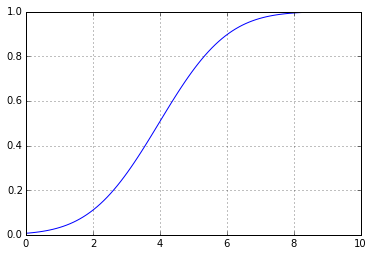

In [29]:
# La representamos
plt.plot(x, y2)
plt.grid(True)

Del mismo modo se pueden usar otras distribuciones continuas o discretas e incluso, definir distribuciones propias. Pero sigamos con las notas...

### Tests

Ahora que ya hemos visualizado la distribución de las notas y que sabemos generar distribuciones normales. ¿Por qué no hacemos un [test de Kolmogórov-Smirnov](http://www.dmae.upm.es/WebpersonalBartolo/Probabilidad/14_ContrasteNoparametrico.pdf)?

Se trata de ver lo bien o lo mal que se ajusta la distribución a una normal con $\mu=3.97$ y $\sigma²=2.57$

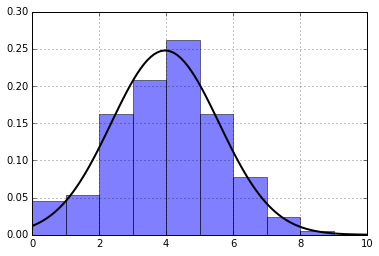

In [30]:
bars = st.histogram(datos, numbins=10, defaultlimits=(0,10))[0]
bars /= 375

plt.bar(np.arange(0,10), bars, alpha=0.5, width=1)
plt.plot(x, y1, c='black', lw=2)

plt.grid(True)

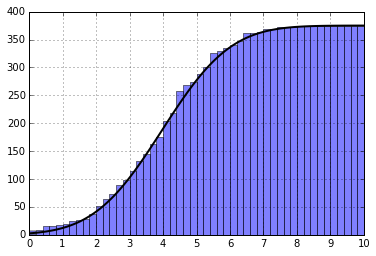

In [31]:
plt.hist(datos, np.linspace(0,10,51), cumulative=True, alpha=0.5)
plt.plot(x, y2 * 375, lw=2, c='black')

plt.xticks(range(0,11))
plt.grid(True)

In [32]:
datos2 = dist_normal.cdf
st.kstest(datos, dist_normal.cdf)

(0.04783071674813294, 0.34838712365988389)

_Se rechaza la hipótesis nula si el valor p asociado al resultado observado es igual o menor que el nivel de significación establecido, convencionalmente 0,05 ó 0,01. Es decir, el valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido si suponemos que la hipótesis nula es cierta._ ([Wikipedia](http://es.wikipedia.org/wiki/Valor_p))

Si probamos con `st.normaltest` que también comprueba la bondad del ajuste obtenemos un _valor-p_ más alto:

In [33]:
st.normaltest(datos)

(1.1315306710610515, 0.56792532695583819)

En definitiva, parece que las notas esta vez siguieron una normal con $\mu=3.97$ y $\sigma²=2.57$

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())